# Логистическая регрессия Theano

In [1]:
import numpy as np

In [2]:
import theano
import theano.tensor as T

In [3]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## Создание обучающей выборки 

Число объектов в обучающей выборке

In [4]:
N = 50

Размерность пространства

In [5]:
d = 2

In [6]:
X_train = np.zeros((N,d))

In [7]:
X_train[:N/2] = np.random.randn(N/2, 2)

In [8]:
X_train[N/2:] = np.random.randn(N/2, 2)+2

In [9]:
y_train = np.zeros(N)

In [10]:
y_train[N/2:] = 1

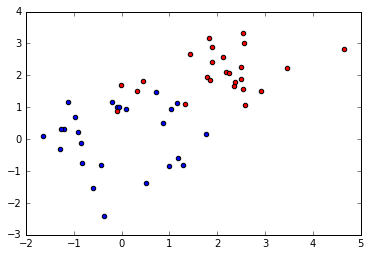

In [11]:
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        plt.scatter(X_train[i,0],X_train[i,1], c='b')
    if y_train[i] == 1:
        plt.scatter(X_train[i,0],X_train[i,1], c='r')
plt.show()

### Описание модели

In [12]:
x = T.dmatrix("x")
y = T.dvector("y")

In [13]:
w = theano.shared(np.random.randn(d), name="w")
b = theano.shared(0., name="b")

In [14]:
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))   
prediction = p_1 > 0.5                        # Пороговое значение
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Функция потерь cross-entropy
cost = xent.mean() + 0.01 * (w ** 2).sum()    # Минимизируемая функция + L2
gw, gb = T.grad(cost, [w, b])

### Создание функции обучения

In [15]:
train = theano.function(
          inputs=[x,y],
          outputs=[prediction, xent],
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))

predict = theano.function(inputs=[x], outputs=prediction)

## Обучение модели

In [16]:
for i in range(100):
    pred, err = train(X_train, y_train)

## Тестирование 

In [17]:
X_test = np.random.randn(1000, d)*2

In [18]:
y_test = predict(X_test)

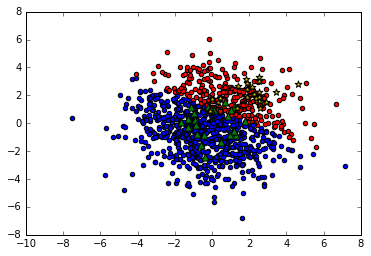

In [19]:
for i in range(y_test.shape[0]):
    if y_test[i] == 0:
        plt.scatter(X_test[i,0],X_test[i,1], c='b')
    if y_test[i] == 1:
        plt.scatter(X_test[i,0],X_test[i,1], c='r')
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        plt.scatter(X_train[i,0],X_train[i,1], c='g', marker='^', s=50)
    if y_train[i] == 1:
        plt.scatter(X_train[i,0],X_train[i,1], c='y', marker='*', s=50)
plt.savefig('LR.png', dpi=300)
plt.show()